### Численные методы ЛР4 (решение систем нелинейных уравнений), задача 4.1. 

### Якименко Александра (32 в списке группы). Выполняемые задачи, согласно приложению 4А: 4.1.2, 4.3.1.

## Задача 4.1. (вариант 2)

Найти с точностью $\varepsilon = 10^{-6}$ все корни системы нелинейных уравнений

$f_1(x_1, x_2) = 0$

$f_2(x_1, x_2) = 0$

используя метод Ньютона для системы нелинейных уравнений. Найти корни с помощью встроенного блока решения уравнений.
         
#### ПОРЯДОК РЕШЕНИЯ ЗАДАЧИ:
* Локализовать корни системы уравнений графически (см. ПРИЛОЖЕНИЕ 4.В).  

* Составить программу-функцию, вычисляющую корень системы двух нелинейных уравнений по методу Ньютона с точностью $\varepsilon$. Предусмотреть подсчет количества итераций. Для решения соответствующей системы  линейных алгебраических уравнений использовать встроенную функцию.

* Используя составленную программу, вычислить все корни заданной системы с точностью $\varepsilon$.

* Используя встроенный блок, найти все корни системы с точностью $\varepsilon$ (см. ПРИЛОЖЕНИЕ 4.В). Сравнить с результатами, полученнными в п. 3.

УКАЗАНИЕ. В п. 1 привеcти уравнения системы к виду $x_2 = g_i(x_1)$  (либо $x_1 = g_i(x_2)$), $i=1,\dots 2$, можно с помощью...


### Система уравнений

$f_1(x_1,x_2) = \cos (x_1-1)+x_2 -0.5 = 0$

$f_2(x_1, x_2) = \sin x_1 + 2x_1 -2 = 0$

Выразим $f_1$ относительно $x_2$ и $f_2$ относительно $x_2$:

$x_2 = g_1(x_1) = 0.5 - \cos(x_1-1)$

$x_2 = g_2(x_1) = \frac{2-\sin x_1}{2}$

In [1]:
import numpy as np

def g1(x):
    return 0.5 - np.cos(x-1)

def g2(x):
    return (2-np.sin(x))/2

def y0(x):
    return x*0

epsilon = 1e-6

## 1. Графическая локализация корней.

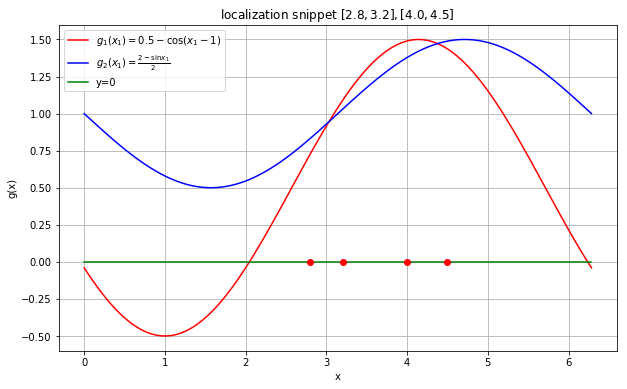

In [2]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
from math import pi

x = np.linspace(0, 2*pi, 100)

fig, ax = plt.subplots(figsize=(10,6))

ax.plot(x, g1(x), 'red', label=r"$g_1(x_1) = 0.5 - \cos(x_1-1)$")
ax.plot(x, g2(x), 'blue', label=r"$g_2(x_1) = \frac{2-\sin x_1}{2}$")
ax.plot(x, y0(x), 'green', label=r"y=0")
ax.plot([2.8, 3.2, 4.0, 4.5], [0, 0, 0, 0], 'ro')
ax.set_xlabel('x')
ax.set_ylabel('g(x)')
ax.grid()
ax.set_title(r"localization snippet $[2.8,3.2],[4.0,4.5]$")
ax.legend(loc=2);
plt.show()

### Корни имеют период $2\pi$

## 2. Решение методом Ньютона.

Составить программу-функцию, вычисляющую корень системы двух нелинейных уравнений по методу Ньютона с точностью $\varepsilon$. Предусмотреть подсчет количества итераций. Для решения соответствующей системы  линейных алгебраических уравнений использовать встроенную функцию.

Метод Ньютона для решения системы уравнений то же самое что и для решения нелинейного уравнения, только теперь вместо производной Якобиан и вместо модуля норма.

$\bar{f}(\bar(x)) = 0$

$\bar{f}(\bar{x}) \approx \bar{f}(\bar{x}^k)+\bar{f'}(\bar{x}^k)(\bar{x}-\bar{x}^k) = 0$

$\bar{f'}(\bar{x}^k)( \bar{x}^{k+1}-\bar{x}^k )= -\bar{f}(\bar{x}^k)$

Заменим

$\bar{f'}(\bar{x}^k) = A_k$

$\bar{x}^{k+1}-\bar{x}^k = \Delta \bar{x}^{k+1}$

$-\bar{f}(\bar{x}^k) = \bar{b}_k$

Получим 

$A_k \Delta \bar{x}^{k+1} = \bar{b}_k$

$\bar{x}^{k-1} = \bar{x}$

Критерий остановки $||\Delta \bar{x}^{k+1}||<\varepsilon$

Зададим матрицу A (якобиан) и вектор b

In [3]:
def f(x1, x2):
    f1 = np.cos(x1-1)+x2-0.5
    f2 = np.sin(x1)+2*x2-2
    return np.array([f1, f2])
def jacob(x1, x2):
    df1dx1 = -np.sin(x1-1)
    df2x2 = np.cos(x1)
    return np.array([[df1dx1, 1],[df2x2, 2]])

In [4]:
def newton(f, jacob, x0, e):
    k = 1
    x_prev = x0
    a = jacob(*x_prev)
    b = -f(*x_prev)
    delta_x = np.linalg.solve(a, b)
    x_curr = x_prev + np.ravel(delta_x)
    while np.linalg.norm(delta_x) > e:
        x_prev = x_curr
        delta_x = np.linalg.solve(jacob(*x_prev), -f(*x_prev))
        x_curr = x_prev + np.ravel(delta_x)
        k+=1
    return (x_curr, k)

## 3. Вычисление корня

In [5]:
newton_roots1 = newton(f, jacob, np.array([2.8, 3.2]), epsilon)
print("первое решение методом Ньютона:\nx =", newton_roots1[0], "\nколичество итераций =", newton_roots1[1])

первое решение методом Ньютона:
x = [ 3.03272039  0.94567134] 
количество итераций = 4


In [6]:
newton_roots2 = newton(f, jacob, np.array([4.0, 4.5]), epsilon)
print("второе решение методом Ньютона:\nx =", newton_roots2[0], "\nколичество итераций =", newton_roots2[1])

второе решение методом Ньютона:
x = [ 4.37769912  1.47225611] 
количество итераций = 5


## 4. Сравнение результатов со встроенным методом

In [8]:
from scipy.optimize import fsolve

def equations(p):
    x1, x2 = p
    return (np.cos(x1-1)+x2-0.5, np.sin(x1)+2*x2-2)

root1 = fsolve(equations, (2.8, 3.2), xtol= epsilon)
root2 = fsolve(equations, (4.0, 4.5), xtol= epsilon)
print("первое решение встроенной функцией:\nx =", root1)
print("второе решение встроенной функцией:\nx =", root2)

первое решение встроенной функцией:
x = [ 3.03272039  0.94567135]
второе решение встроенной функцией:
x = [ 4.37769912  1.47225611]


In [12]:
print("Разница корней найденных с помощью своей функции и строенной:\n", newton_roots1[0]-root1, "\n", newton_roots2[0]-root2)

Разница корней найденных с помощью своей функции и строенной:
 [ -5.54732882e-09  -3.30521377e-09] 
 [  8.94395669e-13   4.18998169e-13]


### Вывод: решение реализованным методом и встроенным совпадают.